<a href="https://colab.research.google.com/github/burton-its/CariesCNN/blob/main/cnntest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Conv1D
from sklearn import metrics



To start, this is a difficult problem set due to the nature of the classification problem. Along with that the train/test dataset sizes are incredibly small for this problem. 

Objective: Application of deep learning to conduct a binary classification of dental caries within radiographs. Patient radiographs were anonymized and classified as a caries lesions or a non caries lesion by a DDS. 
Methods: 50 radiographs were used to assess binary classification, 40 images were used as a training dataset and 10 images were used as a test dataset. A Convolutional Neural Network was used to conduct this classification. 
Results: The neural network showed an accuracy of .975 which, while it looks incredibly good, is most likely indicative of overfitting due to the small sample size. 

In [2]:
len(os.listdir('/content/drive/MyDrive/data/Train/train_nocaries'))

21

In [ ]:
# %cd /content/drive/MyDrive/data/Train/
# %rm -r .ipynb_checkpoints/

/content/drive/MyDrive/data/Train
rm: cannot remove '.ipynb_checkpoints/': No such file or directory


In [3]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/data/Train',
                                                     target_size=(256, 256),
                                                     batch_size=40,
                                                     class_mode='binary',
                                                     seed=123)

Found 40 images belonging to 2 classes.


In [4]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/data/Test',
                                                     target_size=(256, 256),
                                                     batch_size=10,
                                                     class_mode='binary',
                                                     seed=123)

Found 10 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'train_caries': 0, 'train_nocaries': 1}

In [6]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

In [7]:
y_train = y_train.astype('int')
y_train

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [9]:
y_test

array([0., 0., 1., 1., 1., 0., 0., 1., 1., 0.], dtype=float32)

In [8]:
X_train.shape

(40, 256, 256, 3)

In [10]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
# model.add(Conv2D(64,(3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

# model = Sequential()
# model.add(Conv2D(4, 4, activation="relu", input_shape=(256,256,3)))
# model.add(Dense(256, activation="softmax"))
# model.add(Flatten())
# model.add(Dense(1))

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1032256)           0         
                                                                 
 dense (Dense)               (None, 64)                66064448  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 66,066,305
Trainable params: 66,066,305
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])


# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=15)

Epoch 1/15
2/2 [==============================] - 3s 798ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 2/15
2/2 [==============================] - 3s 755ms/step - loss: 0.0750 - accuracy: 1.0000
Epoch 3/15
2/2 [==============================] - 3s 799ms/step - loss: 0.0414 - accuracy: 1.0000
Epoch 4/15
2/2 [==============================] - 3s 788ms/step - loss: 0.0611 - accuracy: 1.0000
Epoch 5/15
2/2 [==============================] - 3s 761ms/step - loss: 0.0344 - accuracy: 1.0000
Epoch 6/15
2/2 [==============================] - 3s 795ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 7/15
2/2 [==============================] - 3s 785ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 8/15
2/2 [==============================] - 3s 779ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 9/15
2/2 [==============================] - 3s 733ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 10/15
2/2 [==============================] - 3s 706ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 11/15
2/2 [==

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
predictions = model.predict(X_test)
predictions

array([[0.03292239],
       [0.20085403],
       [0.04781964],
       [0.7847897 ],
       [0.15522704],
       [0.17338052],
       [0.0761027 ],
       [0.85288423],
       [0.5019599 ],
       [0.84670043]], dtype=float32)

In [17]:
predictions = np.where(predictions > 0.5, 1, 0)

In [35]:
from tensorflow.keras.models import save_model, load_model

In [36]:
save_model(model,'cariestest.model')

INFO:tensorflow:Assets written to: cariestest.model/assets


In [37]:
saved_model = load_model('cariestest.model', compile=False)
saved_model.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])
saved_model.predict([X_test])

array([[0.03292239],
       [0.20085403],
       [0.04781964],
       [0.7847897 ],
       [0.15522704],
       [0.17338052],
       [0.0761027 ],
       [0.85288423],
       [0.5019599 ],
       [0.84670043]], dtype=float32)

In [18]:
cc_test = confusion_matrix(y_test, predictions)

In [19]:
cc_test

array([[4, 1],
       [2, 3]])

-ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
-Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
-ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.-

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)

In [28]:
auc = roc_auc_score(y_test, predictions)
roc_auc = metrics.auc(fpr,tpr)
print('AUC: %.3f' % auc)

AUC: 0.700


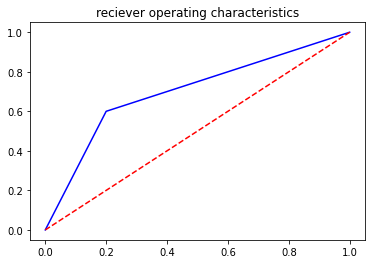

In [33]:
from matplotlib import pyplot

plt.plot(fpr, tpr, 'b', label = 'AUC - .7' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('reciever operating characteristics')
plt.ylabel = ('True positive')
plt.xlabel = ('False positive')
plt.show()